<div align="center">

# Investigating NICS and Census Datasets

</div>

## Abstract


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a>
    <ul>
        <li>Dataset Description</li>
        <li>Questions for analysis</li>
    </ul>
</li>
<li><a href="#wrangling">Data Wrangling</a>
    <ul>
        <li>Loading the datasets</li>
        <li>Initial exploration</li>
        <li>Data assessment
            <ul>
                <li>Missing values</li>
                <li>Duplicated values</li>
                <li>Outliers</li>
                <li>Inconsistencies</li>
            </ul>
        </li>
        <li>Data cleaning</li>
    </ul>
</li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li>Question 1:</li>
        <li>Question 2:</li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In the united State of America,

### Dataset Description 

The dataset used in this analysis comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

- **The NICS data:** is found in .csv file. It contains the number of firearm checks by month, state, and type.
The following table shows the details for each column in the dataset.

<div align="center">

**Table 1:** Columns of NICS data with describtion.

| Column Name | Description |
|---|---|
| month | The month the data applies to. |
| state | The state where the data was collected. |
| permit | Number of permits issued. |
| permit_recheck | Number of permit rechecks conducted. |
| handgun | Number of handgun transactions (could be permit applications, purchases, etc.). |
| long_gun | Number of long gun transactions (could be permit applications, purchases, etc.). |
| other | Number of other firearm transactions (could be permit applications, purchases, etc.). |
| multiple | Number of transactions involving multiple firearm types. |
| admin | Number of administrative transactions (could be background checks, license renewals, etc.). |
| prepawn_handgun | Number of handguns pre-pawned. |
| prepawn_long_gun | Number of long guns pre-pawned. |
| prepawn_other | Number of other firearms pre-pawned. |
| redemption_handgun | Number of handguns redeemed from pawn. |
| redemption_long_gun | Number of long guns redeemed from pawn. |
| redemption_other | Number of other firearms redeemed from pawn. |
| returned_handgun | Number of handguns returned to seller. |
| returned_long_gun | Number of long guns returned to seller. |
| returned_other | Number of other firearms returned to seller. |
| rentals_handgun | Number of handgun rentals. |
| rentals_long_gun | Number of long gun rentals. |
| private_sale_handgun | Number of handguns sold privately. |
| private_sale_long_gun | Number of long guns sold privately. |
| private_sale_other | Number of other firearms sold privately. |
| return_to_seller_handgun | Number of handguns returned by buyer to seller (not pawn). |
| return_to_seller_long_gun | Number of long guns returned by buyer to seller (not pawn). |
| return_to_seller_other | Number of other firearms returned by buyer to seller (not pawn). |
| totals | Total number of transactions. |

</div>

- **The U.S. census data:** is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year. The following table shows the details for each column in the dataset.

<div align="center">

**Table 2:** Columns of US census data with describtion.

| Column Name | Description |
|---|---|
| Fact | The overall category or type of the data. |
| Fact Note | Additional notes or details about the Fact column. |
| Alabama | Data specific to Alabama. |
| Alaska | Data specific to Alaska. |
| Arizona | Data specific to Arizona. |
| Arkansas | Data specific to Arkansas. |
| California | Data specific to California. |
| Colorado | Data specific to Colorado. |
| Connecticut | Data specific to Connecticut. |
| Delaware | Data specific to Delaware. |
| Florida | Data specific to Florida. |
| Georgia | Data specific to Georgia. |
| Hawaii | Data specific to Hawaii. |
| Idaho | Data specific to Idaho. |
| Illinois | Data specific to Illinois. |
| Indiana | Data specific to Indiana. |
| Iowa | Data specific to Iowa. |
| Kansas | Data specific to Kansas. |
| Kentucky | Data specific to Kentucky. |
| Louisiana | Data specific to Louisiana. |
| Maine | Data specific to Maine. |
| Maryland | Data specific to Maryland. |
| Massachusetts | Data specific to Massachusetts. |
| Michigan | Data specific to Michigan. |
| Minnesota | Data specific to Minnesota. |
| Mississippi | Data specific to Mississippi. |
| Missouri | Data specific to Missouri. |
| Montana | Data specific to Montana. |
| Nebraska | Data specific to Nebraska. |
| Nevada | Data specific to Nevada. |
| New Hampshire | Data specific to New Hampshire. |
| New Jersey | Data specific to New Jersey. |
| New Mexico | Data specific to New Mexico. |
| New York | Data specific to New York. |
| North Carolina | Data specific to North Carolina. |
| North Dakota | Data specific to North Dakota. |
| Ohio | Data specific to Ohio. |
| Oklahoma | Data specific to Oklahoma. |
| Oregon | Data specific to Oregon. |
| Pennsylvania | Data specific to Pennsylvania. |
| Rhode Island | Data specific to Rhode Island. |
| South Carolina | Data specific to South Carolina. |
| South Dakota | Data specific to South Dakota. |
| Tennessee | Data specific to Tennessee. |
| Texas | Data specific to Texas. |
| Utah | Data specific to Utah. |
| Vermont | Data specific to Vermont. |
| Virginia | Data specific to Virginia. |
| Washington | Data specific to Washington. |
| West Virginia | Data specific to West Virginia. |
| Wisconsin | Data specific to Wisconsin. |
| Wyoming | Data specific to Wyoming. |

</div>

### Question(s) for Analysis
- state one or more questions that you plan on exploring over the course of the report.
- address these questions in the **data analysis** and **conclusion** sections. 
- Try to build your report around the analysis of at least one dependent variable and three independent variables. 
- If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

Example from them:
- What census data is most associated with high gun per capita? 
- Which states have had the highest growth in gun registrations? 
- What is the overall trend of gun purchases?

Necessary imports:

In [1]:
import pandas as pd
import numpy as np
import os
import re

## Visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id='wrangling'></a>
## Data Wrangling
In this part of the project, the data wrangling pipeline is implemented. Here is the subsections of this pipeline:
- **Loading in the data**: reading data files into pandas dataframes.
- **Initial exploration**: looking into the head, tail, and info of each dataset.
- **Assessing the data**: missing data, duplicated data, outliers, and inconsistent data between the two datasets.
- **Data Cleaning**: decisions based on the assessment to trim and clean the datasets for analysis and finally merge them into a single dataset.

### **Loading the datasets**

In [2]:
def load_data(path="./Database_Ncis_and_Census_data"):
    """
    This function loads the dataset into pandas dataFrames
    Args:
        path(str): Path to the datasets files with the deafult value
    Returns:
        dfs (list): list of of pandas dataFrames (pd.DataFrame)
    """
    dfs = []
    for file in os.listdir(path):
        if file.endswith(".csv"):
            dfs.append(pd.read_csv(path+'/'+file))
        else:
            print(f"{file} is not a csv file")
    return dfs

In [3]:
dfs = load_data()
guns_dataset = dfs[0]
census_dataset = dfs[1]

### **Initial Exploration the Datasets**
This will include looking into the following:
- Head, Tail, Info
- Statics Description
- Number of Unique Values

In [4]:
def initial_exploration(df):
    """
    This function explores the dataset with missing, info, and outliers
    Args:
        df(pd.DataFrame):
    Returns:
        Nothing, displays the dataset explorations
    """
    if isinstance(df, pd.DataFrame):
        print("Shape of this dataset is: ", df.shape)
        display(df.head())
        display(df.tail())
        display(df.info())
    else:
        print("TypeError: This is not a pandas DataFrame")

#### Guns Dataset:
First of all let's explore the guns dataset:

In [5]:
initial_exploration(guns_dataset)

Shape of this dataset is:  (12485, 27)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

None

>This dataset (Gun dataset) has the Shape of (12485, 27), it contains 12485 instances and 27 features. These features are mainly numerical of types such as int, float. It is noticted that these fetaurs have various features scales given that the means of each is on diffrent scales [0-1, 0-12, 0-71, 0-200...] etc. From the initial look, the non-null value counts for each column has diffrent values than the shape of the data which has to be (12485), that indicates the missing values. Another indication for the missing valeus, is when looking at the tail of the datset, the NaN values are observed. For the memory usage of this dataset it is 2.6+ MB

- Let's look at the unique values for each column to later make better datatypes optimizations:

In [6]:
guns_dataset.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

> It is noticed that this dataset is collected across 227 unique months, that could be problematic since the unqies months values are suppopsed to be 12 months only. The month columns appears to include both the month and the year of the record. These records were also collected in doffrent 55 states, and 499 admins.

- Statistics Descriptions for each column, which is permutated for better readability:

In [7]:
guns_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
permit,12461.0,6413.629404,23752.338269,0.0,0.00,518.0,4272.00,522188.0
permit_recheck,1100.0,1165.956364,9224.200609,0.0,0.00,0.0,0.00,116681.0
handgun,12465.0,5940.881107,8618.584060,0.0,865.00,3059.0,7280.00,107224.0
long_gun,12466.0,7810.847585,9309.846140,0.0,2078.25,5122.0,10380.75,108058.0
other,5500.0,360.471636,1349.478273,0.0,17.00,121.0,354.00,77929.0
multiple,12485.0,268.603364,783.185073,0.0,15.00,125.0,301.00,38907.0
admin,12462.0,58.898090,604.814818,0.0,0.00,0.0,0.00,28083.0
prepawn_handgun,10542.0,4.828021,10.907756,0.0,0.00,0.0,5.00,164.0
prepawn_long_gun,10540.0,7.834156,16.468028,0.0,0.00,1.0,8.00,269.0
prepawn_other,5115.0,0.165591,1.057105,0.0,0.00,0.0,0.00,49.0


> It is noticed that all numerical columns in this dataset 

#### Census Dataset:
Now let's explore the Census dataset:

In [8]:
initial_exploration(census_dataset)

Shape of this dataset is:  (85, 52)


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

None

>This dataset (Census dataset) has the Shape of (85, 52), it contains 85 instances and 52 features. These features are are objects of datatypes. It is noticted that these fetaurs have various features scales some of which are counts and some are percentegaes (%). From the initial look, the non-null value counts for each column has diffrent values than the shape of the data which has to be (85), most of them are missing (20) values, that indicated the missing values. Another indication for the missing valeus, is when looking at the tail of the datset, the NaN values are observed. For the memory usage of this dataset it is 34.7+ KB.

>The states data are shared between the two datasets, this will be explored in the bext section.

- Number of Unique values for each column in the dataset to make better optimization decisions.

In [9]:
census_dataset.nunique()

Fact              80
Fact Note         15
Alabama           65
Alaska            64
Arizona           64
Arkansas          64
California        63
Colorado          64
Connecticut       63
Delaware          64
Florida           64
Georgia           64
Hawaii            63
Idaho             63
Illinois          65
Indiana           63
Iowa              65
Kansas            65
Kentucky          65
Louisiana         65
Maine             64
Maryland          64
Massachusetts     65
Michigan          64
Minnesota         65
Mississippi       65
Missouri          64
Montana           65
Nebraska          65
Nevada            63
New Hampshire     65
New Jersey        65
New Mexico        64
New York          65
North Carolina    65
North Dakota      63
Ohio              64
Oklahoma          64
Oregon            63
Pennsylvania      65
Rhode Island      64
South Carolina    65
South Dakota      65
Tennessee         64
Texas             64
Utah              64
Vermont           63
Virginia     

> This series, showed the number of unique values for each column of the columns have distinct values at almost at each record of the dataset. Since the 20 of the records are detected to be missing, so most of the records are distinct and unique.

- Statics describing of the numerical features in the dataset:

In [10]:
census_dataset.describe(include='all').T

,count,unique,top,freq
Fact,80,80,"Population estimates, July 1, 2016, (V2016)",1
Fact Note,28,15,(c),6
Alabama,65,65,"4,863,300",1
Alaska,65,64,7.30%,2
Arizona,65,64,50.30%,2
Arkansas,65,64,50.90%,2
California,65,63,6.80%,2
Colorado,65,64,3.30%,2
Connecticut,65,63,0.10%,2
Delaware,65,64,51.60%,2


>It is noticed that, 

### **Assess datasets**
In this sub-section, each of the datasets are assessed against having the follwing:
- Detecting Missing values and the percebtages of missing values.
- Detecting Duplicates values and the percentages of duplicates.
- Detecting outliers and the percentages of outliers.
- Detecting inconsistency of columns or values that would affect the mergere later on.

#### **Missing values detection:**
Let's detect wether there are missing values and what is the percentage of missing values in each of the datasets:

In [11]:
def find_missing_percentage(df, col=False, col_name=None):
    """
    To caculate the percentage of missing data in a column, or for the whole dataset
    Args:
        df (pd.DataFrame): specific data type that contains the col
        col (str): column name or key
    Returns:
        (float %): percentage of missing data
        KeyError if the column name is missing
    """
    if isinstance(df, pd.DataFrame):
        if col is True:
            ## find missing values percentage for specific column
            if col_name in df.columns:
                return (1 - (df[col].shape[0] - df[col].isna().sum())/np.prod(df[col].shape)) *100
            else:
                return "Key Error: missing column"
        else:
            ## find the missing values percentage in all dataset
            print("Total of missing percentage (%): ", (df.isna().sum().sum() / np.prod(df.shape)) * 100)
            return (df.isna().sum()/ np.prod(df.shape)) * 100
    else:
        print("TypeError: This is not a pandas DataFrame")

##### Guns Dataset
For this dataset, we know already that there are missing values from the initial exploration of the dataset. Let's take a look on the percentage of missing values to help in figuring out what is best to handle them:

In [12]:
find_missing_percentage(guns_dataset)

Total of missing percentage (%):  45.860959076818105


month                        0.000000
state                        0.000000
permit                       0.007120
permit_recheck               3.377386
handgun                      0.005933
long_gun                     0.005636
other                        2.072116
multiple                     0.000000
admin                        0.006823
prepawn_handgun              0.576395
prepawn_long_gun             0.576989
prepawn_other                2.186327
redemption_handgun           0.575505
redemption_long_gun          0.575802
redemption_other             2.186327
returned_handgun             3.051069
returned_long_gun            3.067385
returned_other               3.165280
rentals_handgun              3.410018
rentals_long_gun             3.458966
private_sale_handgun         2.887910
private_sale_long_gun        2.887910
private_sale_other           2.887910
return_to_seller_handgun     2.969489
return_to_seller_long_gun    2.887910
return_to_seller_other       3.034753
totals      

> It is noticed that the percentage of missing values in the guns dataset is varaible, some columns dont' have missing values, and some reach missing percentage of 3% of that column. However the total percentage of missing values along the whole dataset is very high such as it reaches (45.861%) (rounded). 
> another note about the column 'total' it has zero percentage of missing values that could be used to calculate or obtain some others of the missing values latter on.

##### Census Dataset

In [13]:
find_missing_percentage(census_dataset)

Total of missing percentage (%):  24.02714932126697


Fact              0.113122
Fact Note         1.289593
Alabama           0.452489
Alaska            0.452489
Arizona           0.452489
Arkansas          0.452489
California        0.452489
Colorado          0.452489
Connecticut       0.452489
Delaware          0.452489
Florida           0.452489
Georgia           0.452489
Hawaii            0.452489
Idaho             0.452489
Illinois          0.452489
Indiana           0.452489
Iowa              0.452489
Kansas            0.452489
Kentucky          0.452489
Louisiana         0.452489
Maine             0.452489
Maryland          0.452489
Massachusetts     0.452489
Michigan          0.452489
Minnesota         0.452489
Mississippi       0.452489
Missouri          0.452489
Montana           0.452489
Nebraska          0.452489
Nevada            0.452489
New Hampshire     0.452489
New Jersey        0.452489
New Mexico        0.452489
New York          0.452489
North Carolina    0.452489
North Dakota      0.452489
Ohio              0.452489
O

> It is noticed that the missing values in the census datasets are consistent within each column that means there could be missing from the same rows and ready to be dropped, The highest percentage of missing values is within the Fact Note column. The whole percentage of missing values from the census dataset is relativly lower than within the guns datsets (24.0272%) (rounded)

#### **Duplicates detection:**

In [14]:
def find_duplicates_percentage(df, col =False, col_name = None):
    """
    To caculate the percentage of duplicated data in a column, or for the whole dataset
    Args:
        df (pd.DataFrame): specific data type that contains the col
        col (str): column name or key
    Returns:
        (float %): percentage of duplicted data
        KeyError if the column name is missing
    """
    if isinstance(df, pd.DataFrame):
        if col is True:
            ## find duplicate values percentage for specific column
            if col_name in df.columns:
                return (len(df[df.duplicated(subset=col)]) / len(df)) * 100
            else:
                return "Key Error: missing column"
        else:
            ## find the duplicates percentage in all dataset
            return print("Total of duplicated percentage (%) is: ", (len(df[df.duplicated()]) / len(df)) * 100) 
    else:
        print("TypeError: This is not a pandas DataFrame")
    

##### Guns Dataset

In [15]:
find_duplicates_percentage(guns_dataset)
guns_dataset.duplicated().any()

Total of duplicated percentage (%) is:  0.0


False

> In the Gun dataset there is no duplicated records detected, it is 0.0 percebtage of duplicated values.

##### Census Dataset

In [16]:
find_duplicates_percentage(census_dataset)
census_dataset.duplicated().any()

Total of duplicated percentage (%) is:  3.5294117647058822


True

> The census dataset has some duplicated values, it has a percentage of (3.5294%) duplicated records.

#### **Outliers detection:**

In [17]:
def visualize_outliers(df, col=False, col_name=None):
    """
    To visualize the outliers in a column, or for the whole dataset
    Args:
        df (pd.DataFrame): specific dataset that contains the cols
        col(boolean): whether to check for column, or not
        col (str): column name or key
    Returns:
        Nothing, prints a type error if it's not pandas.Dataframe
    """
    if isinstance(df, pd.DataFrame):
        if col is True:
            plt.figure(figsize=(12, 5)) 
            df[col_name].plot(kind='box')
            plt.title('Figure: Boxplot of column') 
        else:
            plt.figure(figsize=(15, 8)) 
            df.boxplot() 
            plt.title('Figure: Boxplot of the dataset columns') 
        
        plt.xlabel('Columns')  
        plt.ylabel('Values') 
        plt.grid(False)
        plt.minorticks_on()
        plt.tick_params(axis='x', rotation=70) 
        plt.show()
    else:
        print("TypeError: This is not a pandas DataFrame")

##### Guns Dataset

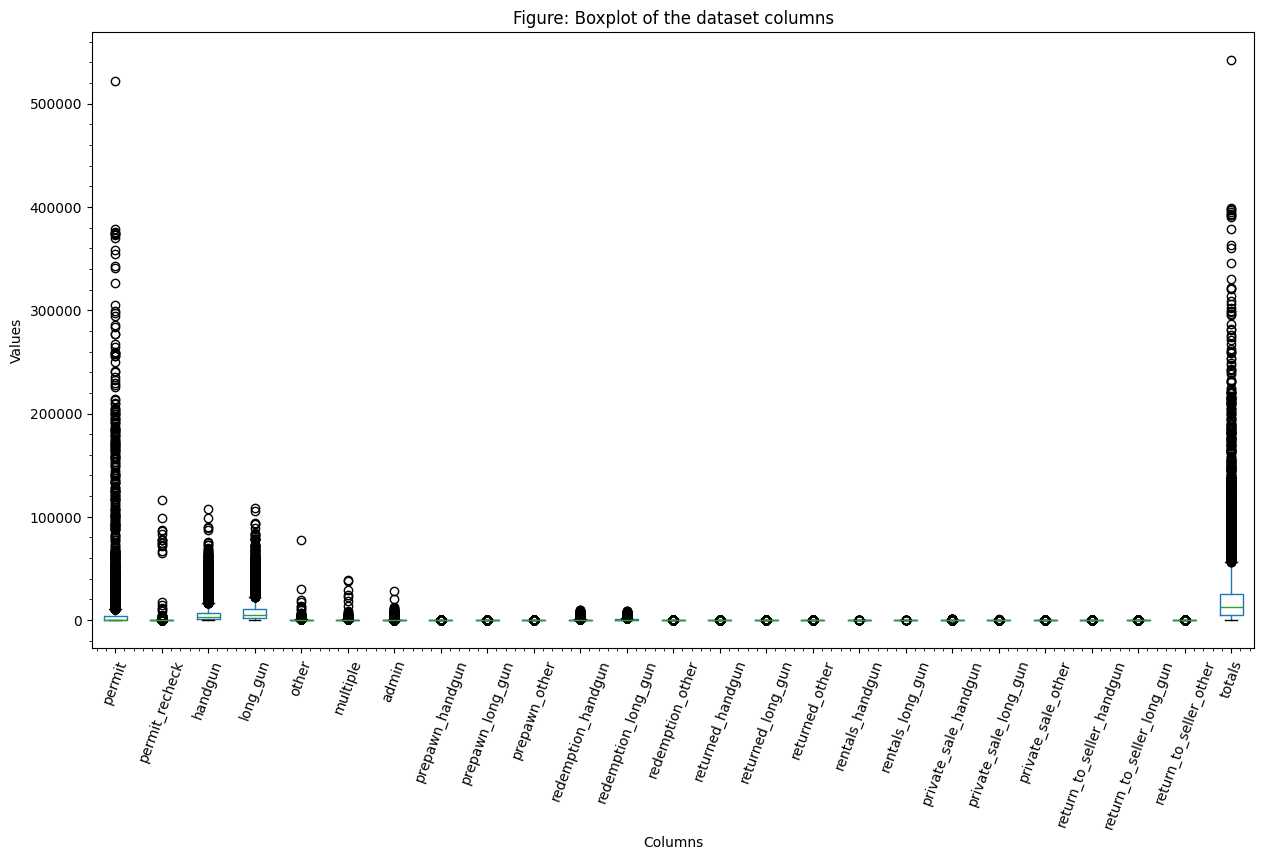

In [18]:
visualize_outliers(guns_dataset)

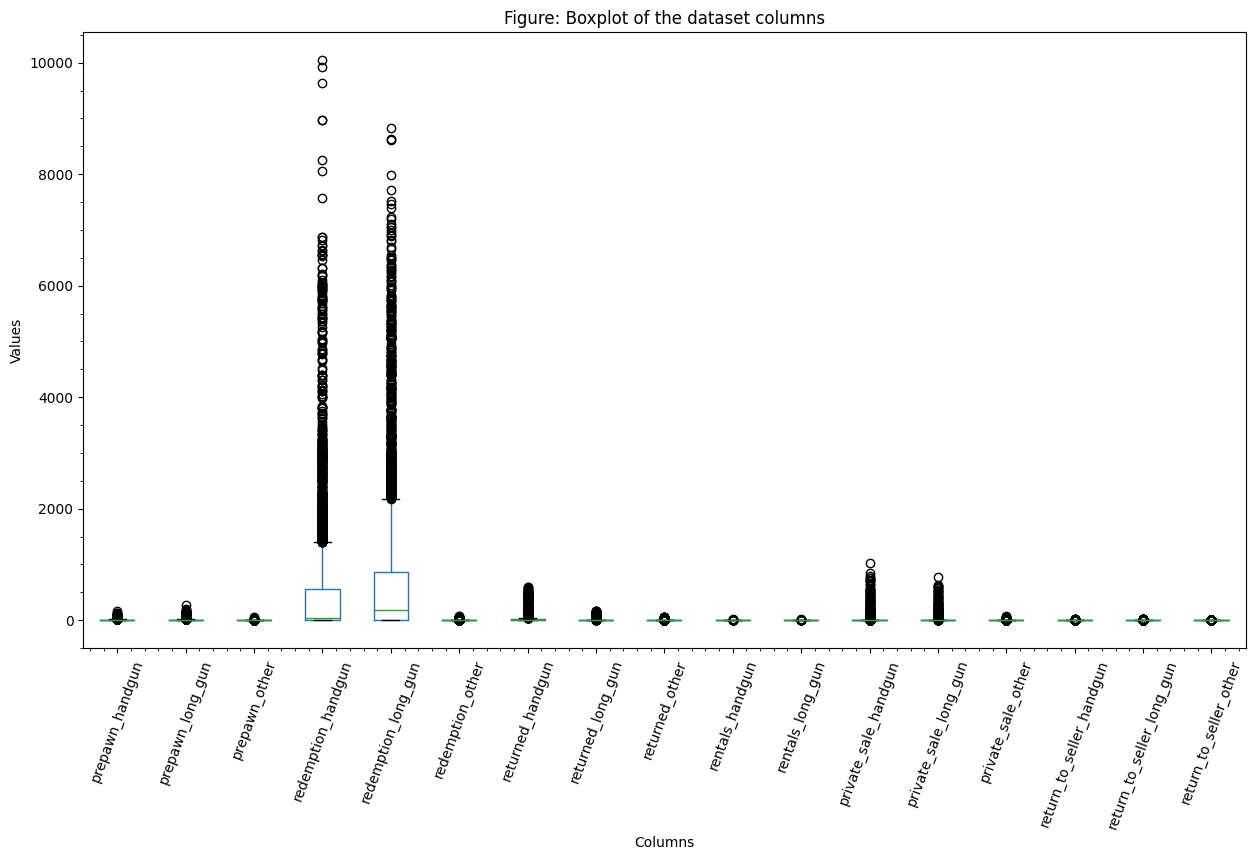

In [19]:
## Taking a closer look at the box plots of these columns to detect the outliers
visualize_outliers(guns_dataset.loc[:,'prepawn_handgun':'return_to_seller_other'])

> It is apparent from the box plots that the gun datasets contains outliers in the columns where the points in black are way more larger than the IQR box. It is also noticed that the outliers are in the larger values, since all the columns have teh minimum values of 0. All of the columns of the datset of guns have numerical outliers shown in the box plots. 

##### Census Dataset

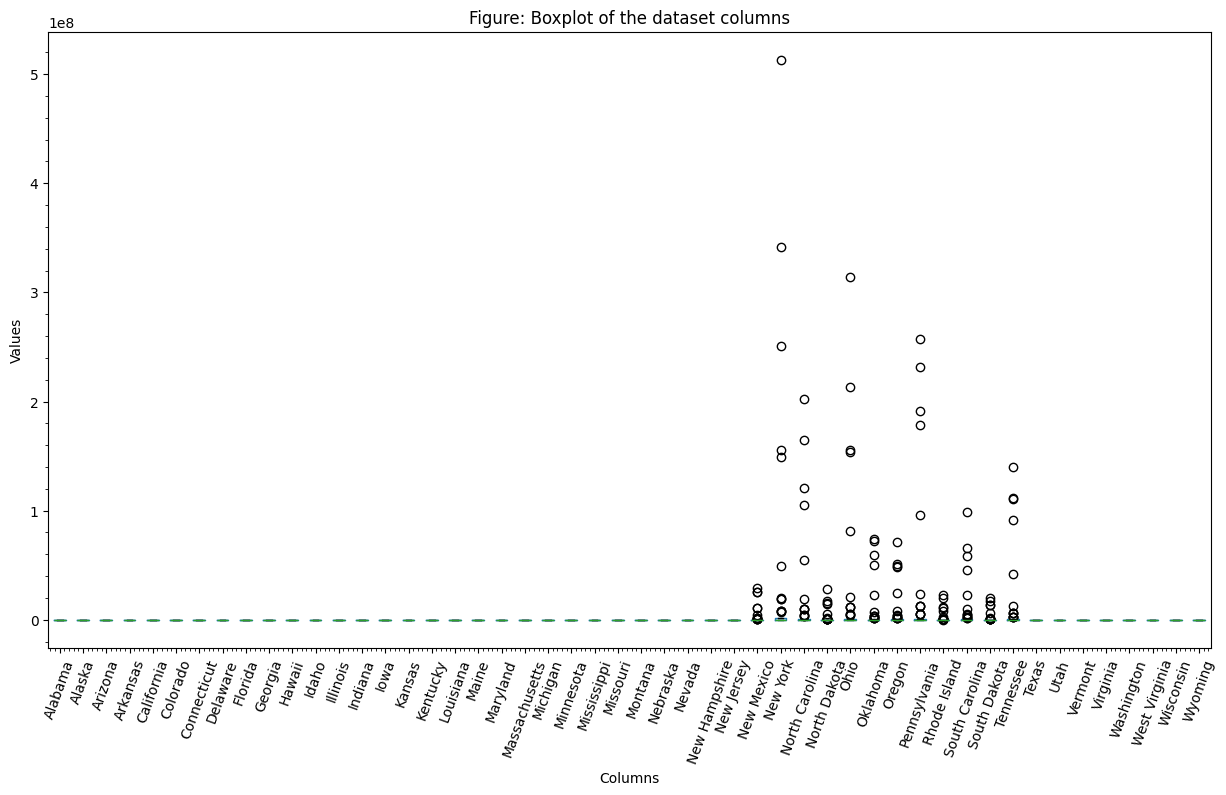

In [20]:
## Initially the columns are converted to numerical dtypes so that they can be tested agianst outliers
for col in census_dataset.iloc[:, 2:].columns: ## iloc the numerical columns
    census_dataset[col] = pd.to_numeric(census_dataset[col], errors='coerce')    

visualize_outliers(census_dataset)

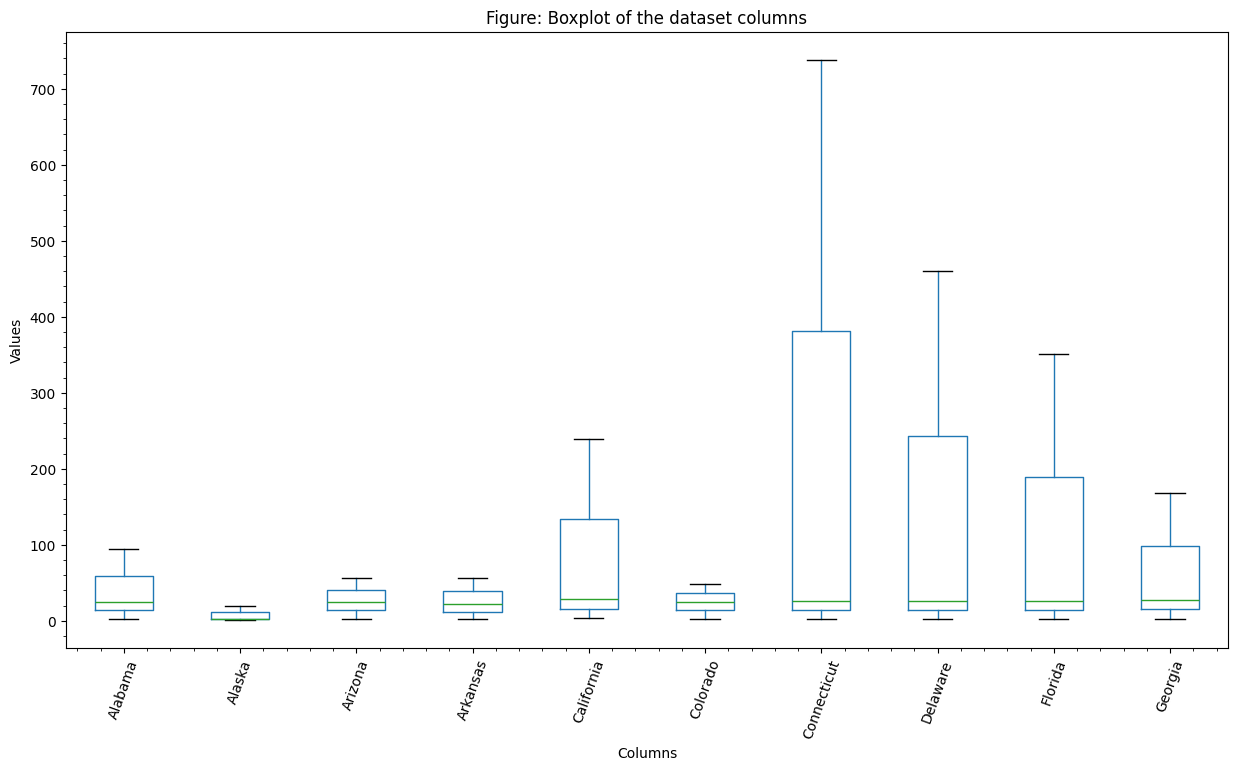

In [21]:
## now let's take a closer look since they seem to not have outliers just to make a closer visulaziion
visualize_outliers(census_dataset.iloc[:,2:12])

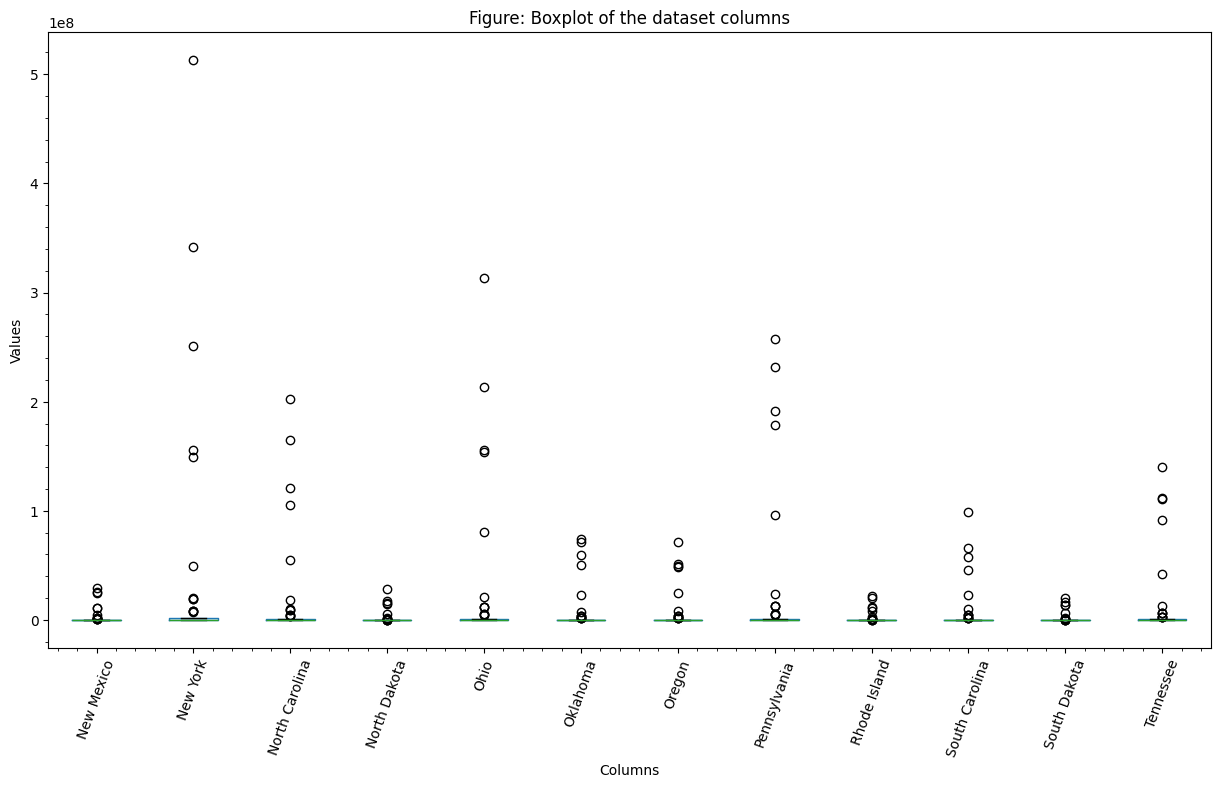

In [22]:
## now let's take a closer look on the columns that shows outliers
visualize_outliers(census_dataset.loc[:,'New Mexico':'Tennessee'])

In [23]:
census_outliers_columns = np.array(census_dataset.loc[:,'New Mexico':'Tennessee'].columns)

> It is notcied that not all of the census dataset columns have numerical outliers but some have. The following np.array shows the states that have been detected to have outliers:

In [24]:
census_outliers_columns

array(['New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee'], dtype=object)

#### **Inconsistency or Bias distributions detection:**

- The following states are not in the second dataset, but in the first one:

In [25]:
unmatched_states = set(dfs[0]['state'].unique()) - set(dfs[1].columns[2:])
unmatched_states

{'District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands'}

- The census dataset has two coulmns that have some information that could be used later on, they look messy, here is an example of both:

In [26]:
for i in range(5):
    if not isinstance(dfs[1]['Fact'][i], float):
        print(dfs[1]['Fact'][i].split(',')) 

for i in range(5):
    if not isinstance(dfs[1]['Fact Note'][i], float):
        print(dfs[1]['Fact Note'][i].split(',')) 

['Population estimates', ' July 1', ' 2016', '  (V2016)']
['Population estimates base', ' April 1', ' 2010', '  (V2016)']
['Population', ' percent change - April 1', ' 2010 (estimates base) to July 1', ' 2016', '  (V2016)']
['Population', ' Census', ' April 1', ' 2010']
['Persons under 5 years', ' percent', ' July 1', ' 2016', '  (V2016)']


> It is noticed that the Fact column has information both the Fact and the Fact Note. In the next section, the info will be extracted from them.

- Distributions: since there are outliers the histogram visualization that are shown here will not neccerally refelect on the distribution of the data. Instead in the next section after the outliers are handled properly.

Census dataset

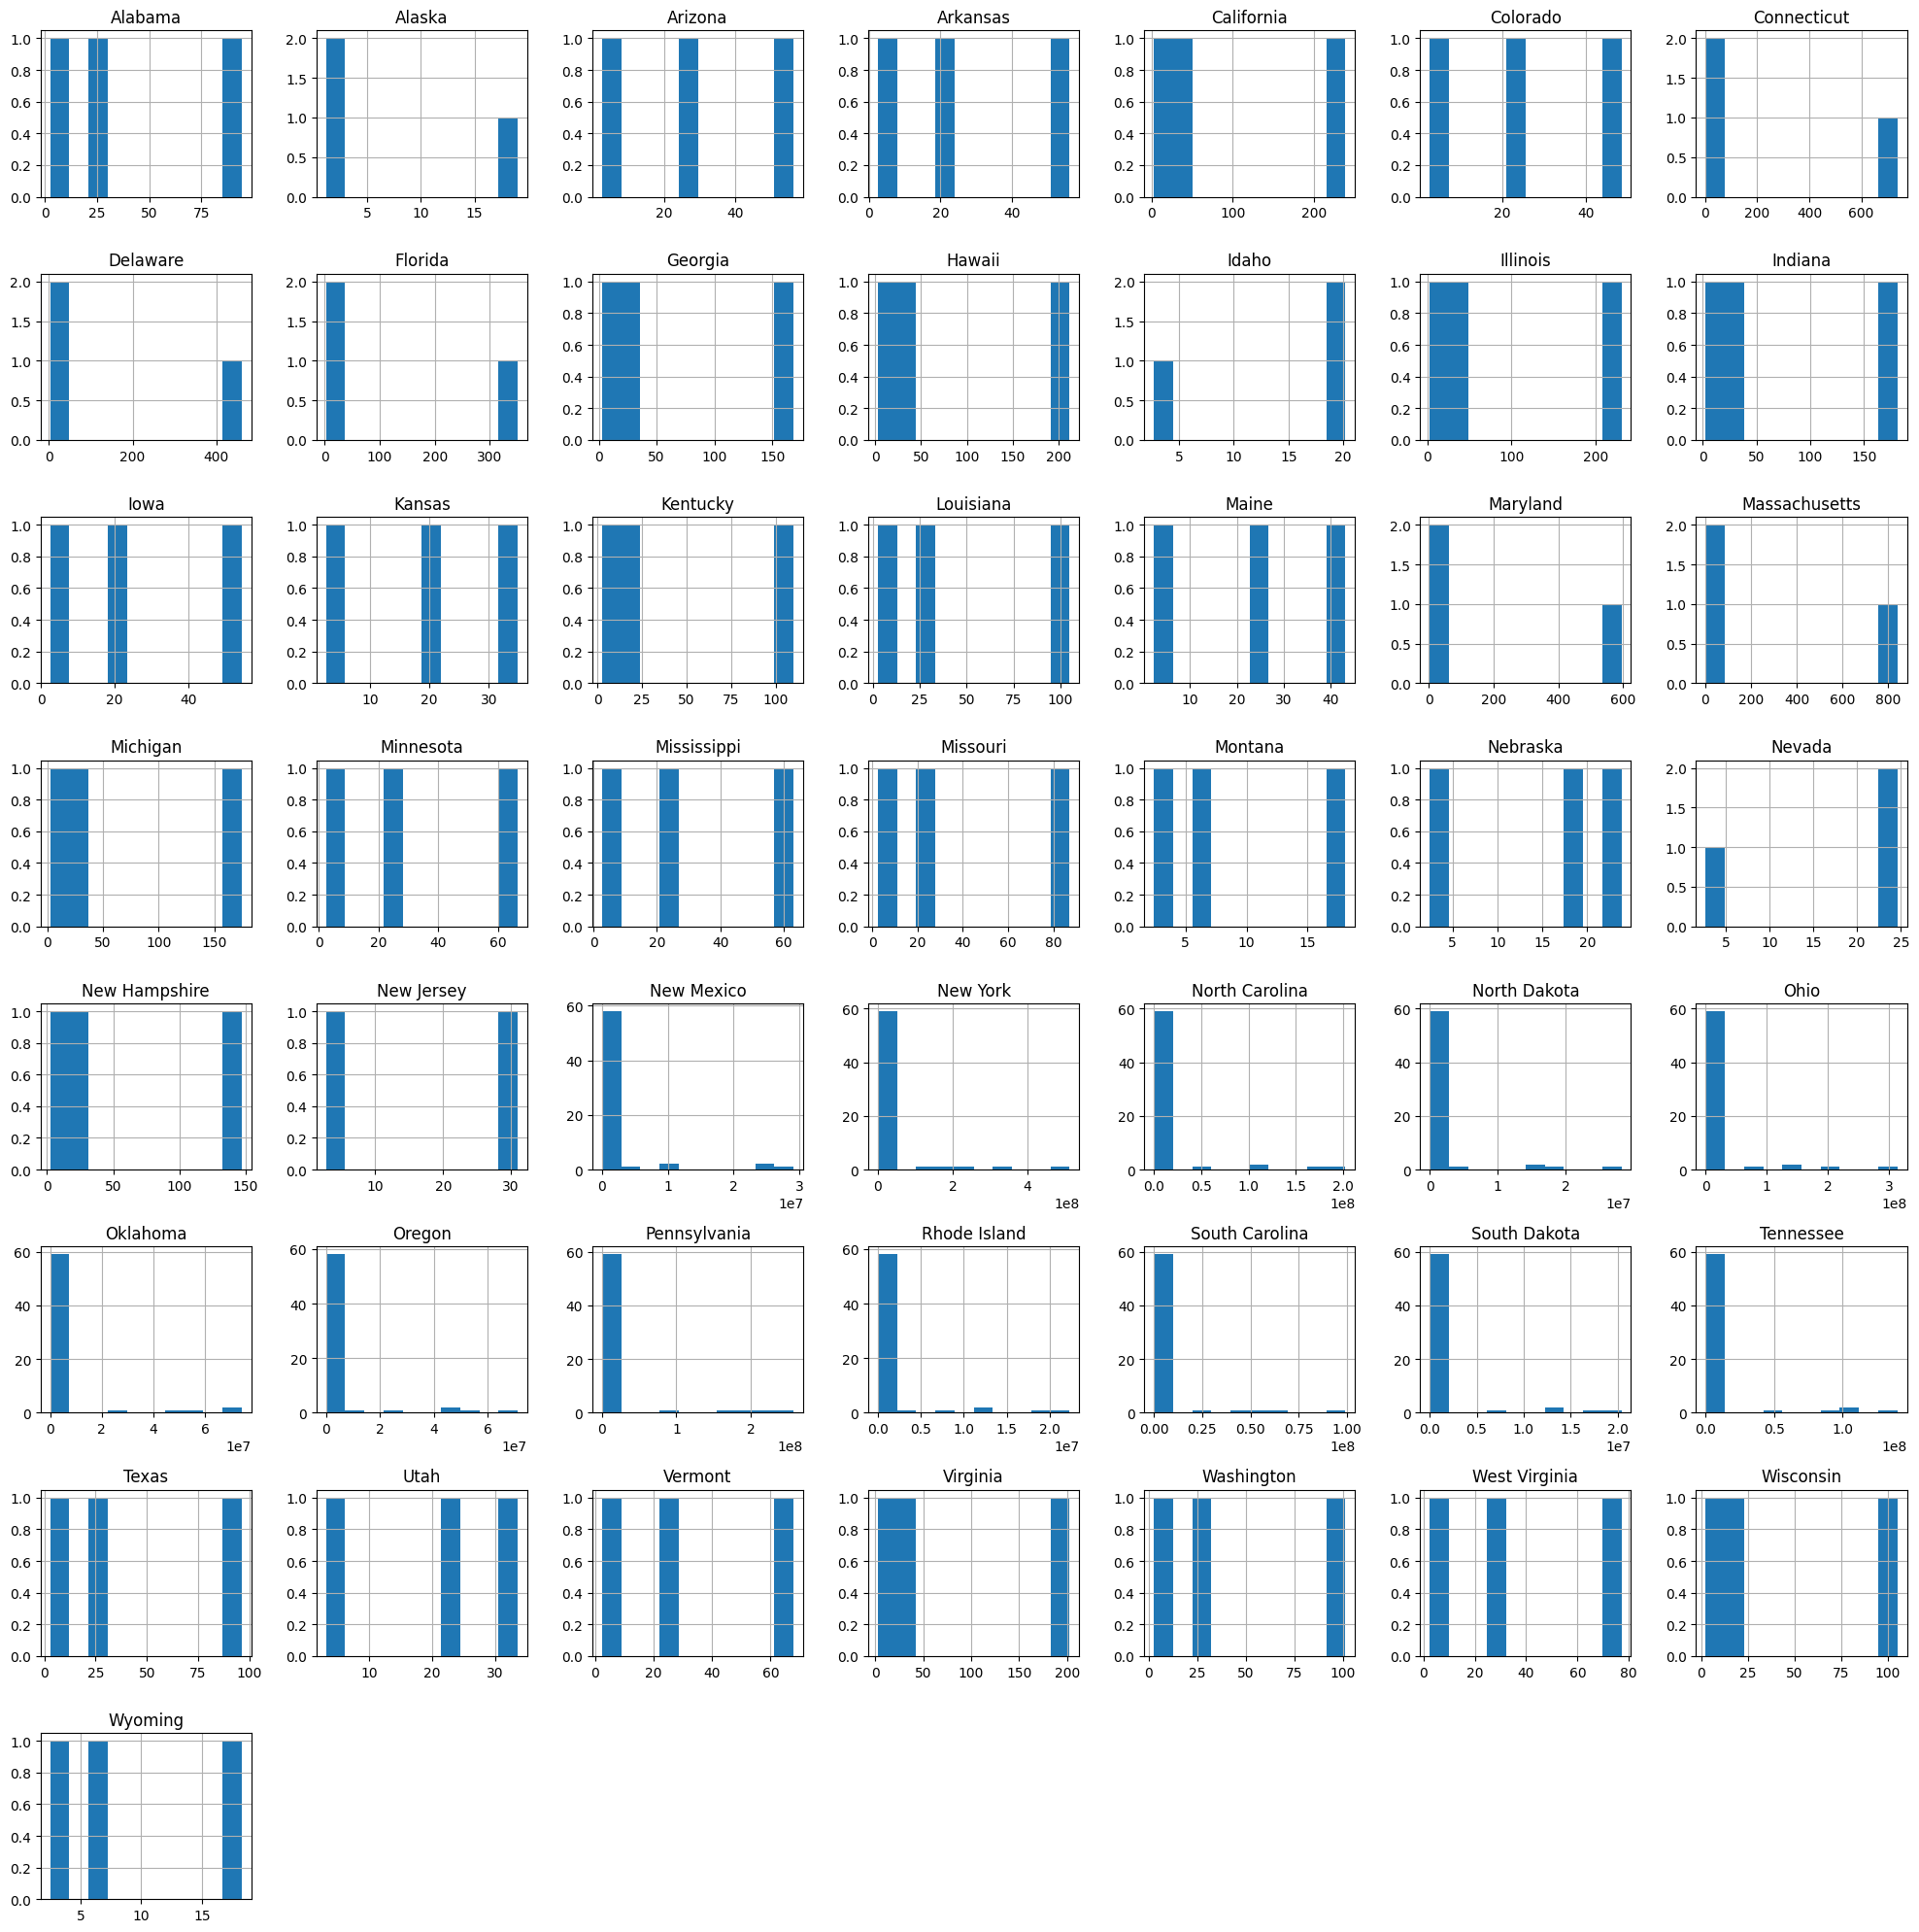

In [27]:
census_dataset.hist(figsize=(20,20));
plt.tight_layout()
plt.show()

Guns dataset

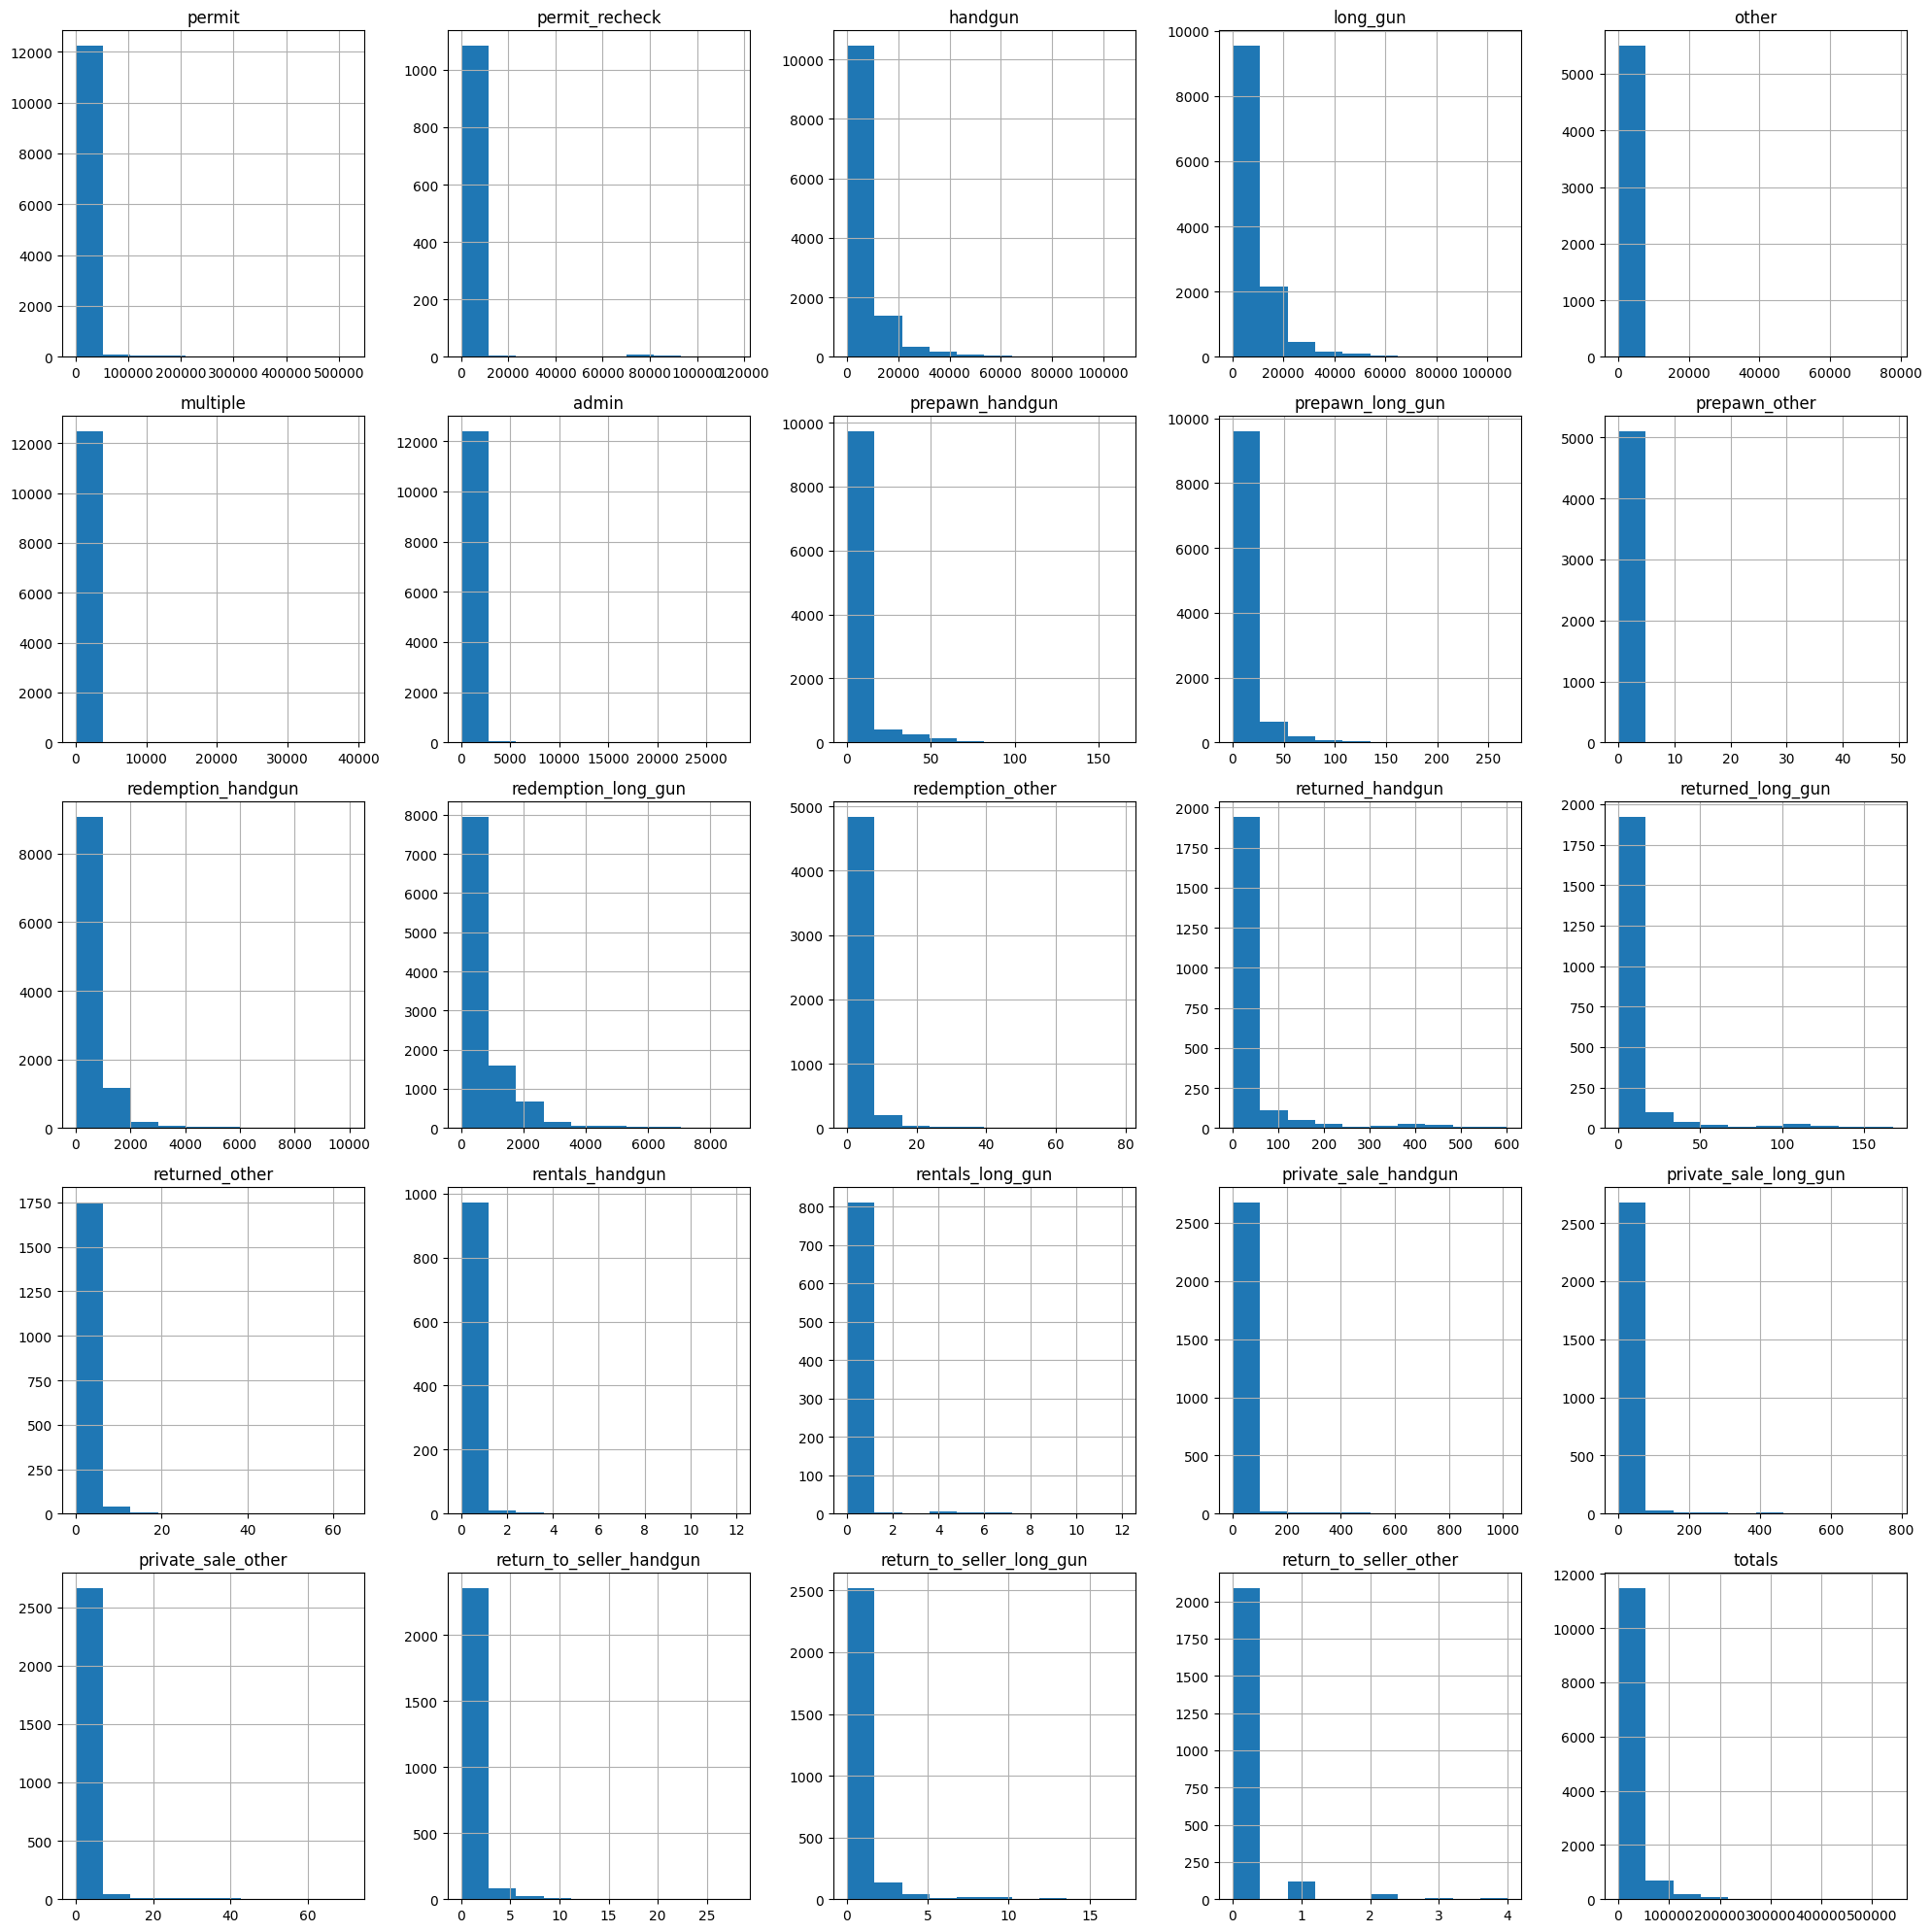

In [28]:
guns_dataset.hist(figsize=(20,20));
plt.tight_layout()
plt.show()

### Data Cleaning
In the previous section, the structure of the data and any problems that needed to be handeled were discussed and detected. In this sections, decisions are made about how to handle these problems to finally reach the best output.

- Mergeing the dataset into one:

For the gun dataset, the following decisions are made, based on the detection that was done from the earlier section of assessment:
- Extract month and year from month column into two and convert to categorical data.
- Drop the states that are mismatched from the census dataset.
- Impute missing values using the Total value. Other values could be impouted from the month before it will see.

Handling Dates in both datasets:

In [29]:
month_names = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

In [30]:
def replace_month(x):
    """
    This function handles the date into two columns months and years
    Args:
        df (pd.DataFrame): specific data type that contains the col month
    Rteurns:
        the modified dataframe with the new columns 
    """    
    if isinstance(x, str):
        return month_names[x]
    else:
        return x

In [31]:
def handle_date_guns(df):
    """
    This function handles the date into two columns months and years
    Args:
        df (pd.DataFrame): specific data type that contains the col month
    Rteurns:
        the modified dataframe with the new columns 
    """    
    if isinstance(df, pd.DataFrame):
        if 'month' in df.columns:
            df['date'] = df['month']
            df['year'] = df['date'].str.split('-').str[0]
            df['month'] = df['date'].str.split('-').str[1]
            df['month'] = df['month'].astype('category')
            df['month'] = df['month'].apply(replace_month)
            df['year'] = df['year'].astype('category')
            df = df.drop('date', axis=1)
            return df
        else:
            print("There is no month column in this dataset")
    else:
        print("TypeError: This is not a pandas DataFrame")

In [32]:
guns_dataset_handle_date  = guns_dataset
guns_dataset_handle_date = handle_date_guns(guns_dataset_handle_date)
guns_dataset_handle_date.head().T

,0,1,2,3,4
month,September,September,September,September,September
state,Alabama,Alaska,Arizona,Arkansas,California
permit,16717.0,209.0,5069.0,2935.0,57839.0
permit_recheck,0.0,2.0,382.0,632.0,0.0
handgun,5734.0,2320.0,11063.0,4347.0,37165.0
long_gun,6320.0,2930.0,7946.0,6063.0,24581.0
other,221.0,219.0,920.0,165.0,2984.0
multiple,317,160,631,366,0
admin,0.0,0.0,0.0,51.0,0.0
prepawn_handgun,15.0,5.0,13.0,12.0,0.0


- Guns datasets timeline:

In [33]:
years = set(guns_dataset_handle_date['year'].sort_values())
print("Years of the guns dataset: ", years)
months = set(guns_dataset_handle_date['month'].sort_values())
print("Months of the guns dataset: ", months)

Years of the guns dataset:  {'2016', '2013', '2014', '2010', '2001', '2012', '2003', '2017', '2007', '1999', '2006', '1998', '2008', '2004', '2011', '2000', '2005', '2002', '2015', '2009'}
Months of the guns dataset:  {'November', 'May', 'March', 'January', 'August', 'February', 'July', 'September', 'April', 'December', 'June', 'October'}


> The datset of the guns records is collected in the follwing timeline:
From the year 1998 - 2017 across all the months of the years

- Census dataset Date info.:

In [34]:
def extract_date_info(fact):
    """
    This function is extracting the date info from a column called fact
    Args:
        fact (str): Pandas dataframe column string values
    Returns:
        the extracted years or months in lists
        or empty lists
    """
    if isinstance(fact, str):
        ## using regualr expressions to try to extract some info from this messy data
        year_pattern = re.compile(r'\b(19\d{2}|20\d{2})\b')
        month_pattern = re.compile(r'\b(January|February|March|April|May|June|July|August|September|October|November|December)\b', re.IGNORECASE)
        
        years = year_pattern.findall(fact)
        months = month_pattern.findall(fact)
        
        return years, months
    return [], []

In [35]:
census_dataset_handle_date = census_dataset
census_dataset_handle_date['Years'], census_dataset_handle_date['Months'] = zip(*census_dataset_handle_date['Fact'].apply(extract_date_info))
census_dataset_handle_date.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Years,Months
0,"Population estimates, July 1, 2016, (V2016)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[2016],[July]
1,"Population estimates base, April 1, 2010, (V2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[2010],[April]
2,"Population, percent change - April 1, 2010 (es...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2010, 2016]","[April, July]"
3,"Population, Census, April 1, 2010",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[2010],[April]
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[2016],[July]


In [43]:
def extract_demographics(fact):
    """
    
    """
    demographics = []
    if isinstance(fact, str):
        demographics.append(fact.split(',')[0])
    
    return demographics

In [46]:
census_dataset_handle_date['Statics_Type'] = census_dataset_handle_date['Fact'].apply(extract_demographics)

In [47]:
census_dataset_handle_date.head().T

,0,1,2,3,4
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ..."
Fact Note,NaN,NaN,NaN,NaN,NaN
Alabama,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,NaN,NaN,NaN,NaN
Arizona,NaN,NaN,NaN,NaN,NaN
Arkansas,NaN,NaN,NaN,NaN,NaN
California,NaN,NaN,NaN,NaN,NaN
Colorado,NaN,NaN,NaN,NaN,NaN
Connecticut,NaN,NaN,NaN,NaN,NaN
Delaware,NaN,NaN,NaN,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

- **Compute statistics**: You should compute the relevant statistics throughout the analysis when an inference is made about the data.
- **create visualizations**:  Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.

with the goal of addressing the research questions that you posed in the Introduction section. 

- Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.
-  You should explore at least three variables in relation to the primary question. 
- This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. 
- Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

In [38]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

### Research Question 2  (Replace this header name!)

In [39]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

- Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.
-  Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 
-  If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!
- cheack all the areas of the rubric. 

create a .html or .pdf version of this notebook in the workspace here. 

In [40]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files
